# Desafio Seazone - Data Science

### 1. Importando as bibliotecas


In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Importando o Excel com as planilhas

In [329]:
# Lendo o Excel
df = pd.ExcelFile('price-info.xlsm')

# Lendo as planilhas
df_fat = pd.read_excel(df, 'Calculo')
df_dia = pd.read_excel(df, 'Dias')

### 3. Ajustando as colunas

In [330]:
# Definindo o nome das colunas para o dataset dos faturamentos mensais
df_fat.columns = ["Id","Jan20","Dez19","Nov19","Out19","Set19","Ago19"]

# Definindo a coluna ID como índice
df_fat.set_index("Id", inplace=True)

# Definindo o nome das colunas para o dataset dos diárias mensais
df_dia.columns = ["Id","Jan20","Dez19","Nov19","Out19","Set19","Ago19"]

# Definindo a coluna ID como índice
df_dia.set_index("Id", inplace=True)

### 4. Explorando 

In [331]:
# Verificando o tamanho da base
df_fat.shape

(499, 6)

#### Verificando as distribuições para cada dataset

In [332]:
df_fat.describe()

,Jan20,Dez19,Nov19,Out19,Set19,Ago19
count,398.000000,432.000000,317.000000,186.000000,248.000000,236.000000
mean,10619.417085,7378.687500,4966.309148,6628.822581,2736.544355,3408.474576
std,12987.857117,11007.204649,10216.372417,13642.069098,5043.182361,6732.874587
min,80.000000,100.000000,75.000000,41.000000,0.000000,0.000000
25%,3870.750000,2260.250000,1074.000000,1192.500000,600.000000,684.000000
50%,7540.500000,4660.500000,2446.000000,2759.500000,1453.500000,1713.000000
75%,12693.500000,8362.500000,5720.000000,6327.500000,3000.000000,3700.000000
max,155000.000000,155000.000000,145000.000000,150000.000000,55000.000000,85000.000000


In [333]:
df_dia.describe()

,Jan20,Dez19,Nov19,Out19,Set19,Ago19
count,398.000000,432.000000,317.000000,186.000000,248.000000,236.000000
mean,21.193467,15.696759,14.564669,18.876344,9.830645,11.241525
std,9.505679,8.258199,9.309367,11.245217,8.101803,7.292442
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13.250000,9.000000,6.000000,7.000000,3.000000,5.000000
50%,24.500000,15.000000,14.000000,21.000000,6.000000,13.000000
75%,30.000000,22.000000,23.000000,30.000000,16.000000,15.000000
max,31.000000,31.000000,30.000000,31.000000,30.000000,31.000000


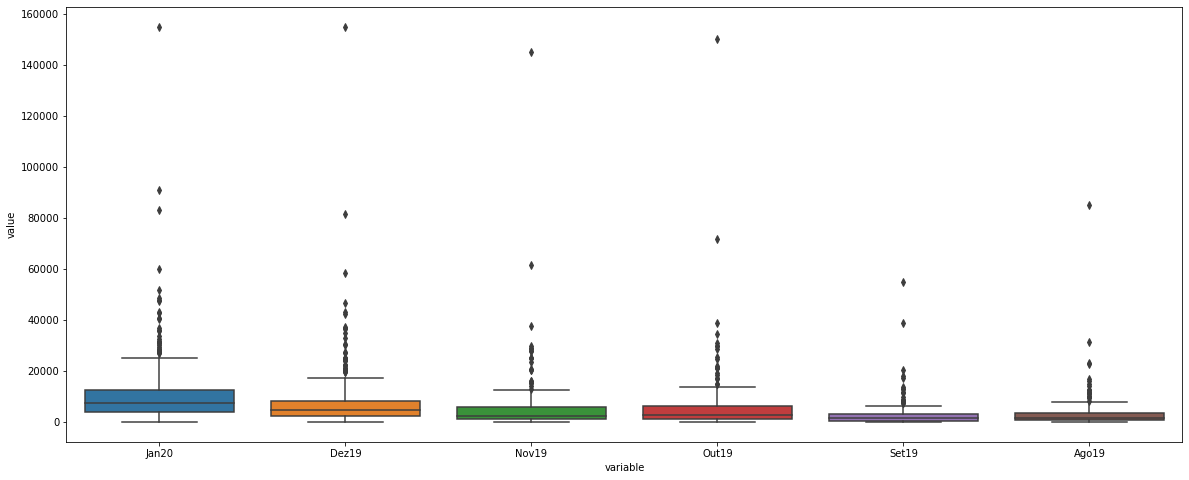

In [334]:
plt.figure(figsize=(20,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df_fat))


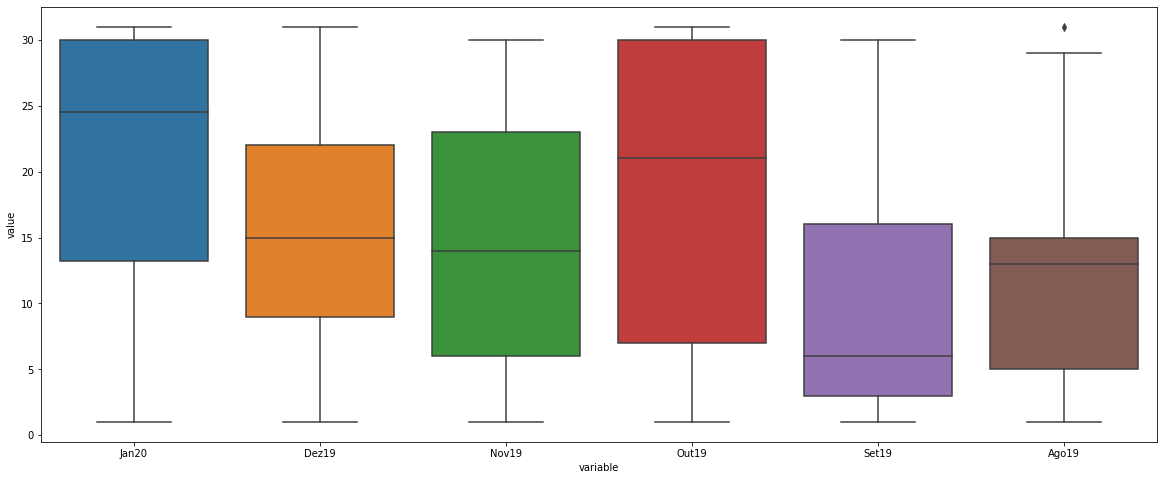

In [335]:
plt.figure(figsize=(20,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df_dia))

In [336]:
# Verificando o total de dados missing para cada coluna do dataset faturamento
df_fat.isna().sum()

Jan20    101
Dez19     67
Nov19    182
Out19    313
Set19    251
Ago19    263
dtype: int64

In [337]:
# Verificando o total de dados missing para cada coluna do dataset diário
df_dia.isna().sum()

Jan20    101
Dez19     67
Nov19    182
Out19    313
Set19    251
Ago19    263
dtype: int64

#### Como ambos os datasets possuem missing iremos preencher esses valores por zero

Não considerar os valores nulos no nosso cálculo faz com que a média dos meses aumente, sendo que o imóvel ficou desocupado e é uma informação relevante para a análise.

In [355]:
#Preenchendo os missings com zero

df_fat.fillna(0, inplace = True)
df_dia.fillna(0, inplace = True)

## Análise

Criando uma coluna com o faturamento total de cada ID

In [356]:
df_fat["Faturamento"] = df_fat.sum(axis=1)

#### - O ID que teve o maior faturamento

In [357]:
max_fat = df_fat['Faturamento'].idxmax()
max_fat

83547

In [358]:
# Visualizando as informações desse ID
df_fat[df_fat.index == max_fat]

,Jan20,Dez19,Nov19,Out19,Set19,Ago19,Faturamento
Id,,,,,,,
83547,155000.0,155000.0,145000.0,150000.0,55000.0,85000.0,1490000.0


#### - O ID que teve o menor faturamento

In [359]:
min_fat = df_fat[df_fat['Faturamento'] > 0.0]['Faturamento'].idxmin()
min_fat

33092756

In [360]:
# Visualizando as informações desse ID
df_fat[df_fat.index == min_fat]

,Jan20,Dez19,Nov19,Out19,Set19,Ago19,Faturamento
Id,,,,,,,
33092756,0.0,0.0,0.0,0.0,45.0,0.0,90.0


 A escolha pelo menor faturamento maior que zero ocorreu porquê há muitos ids com renda zero.

In [361]:
print( "Número de IDs com faturamento zero: ",df_fat[df_fat['Faturamento'] == 0]['Faturamento'].count())
print( "São eles : \n \n", df_fat[df_fat['Faturamento'] == 0].index)

Número de IDs com faturamento zero:  34
São eles : 
 
 Int64Index([   96939,   122504,   130736,   291437,   693457,   748321,
              780550,   942411,   982402,  1564315,  2083416,  2103758,
             2223263,  4293449,  4330674,  4511690,  4587329, 10363087,
            10366668, 10367722, 16251833, 16294535, 16298244, 16323237,
            16331050, 16333503, 16333649, 16849257, 16851036, 16897092,
            31242632, 32982749, 32991670, 32994399],
           dtype='int64', name='Id')


#### - A média de faturamento dos IDs

In [362]:
print("Faturamento médio: ", df_fat.Faturamento.mean())

Faturamento médio:  46911.683366733465


#### - Qual mês apresentou o maior (e o menor) faturamento médio

In [363]:
print("Lista dos faturamentos médios mensais:\n \n", df_fat.mean()[0:6])

Lista dos faturamentos médios mensais:
 
 Jan20    8469.995992
Dez19    6387.961924
Nov19    3154.949900
Out19    2470.863727
Set19    1360.046092
Ago19    1612.024048
dtype: float64


In [364]:
print("Mês com maior faturamento: ", df_fat.mean()[0:6].idxmax())

Mês com maior faturamento:  Jan20


In [365]:
print("Mês com menor faturamento: ", df_fat.mean()[0:6].idxmin())

Mês com menor faturamento:  Set19


Text(0.5, 1.0, 'Aluguel médio por mês')

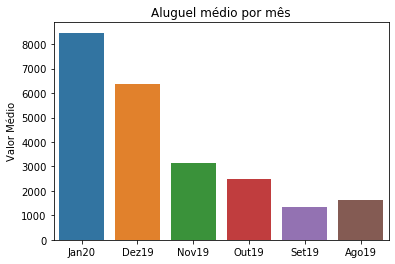

In [366]:
#Visualizando 

sns.barplot(df_fat.mean()[0:6].index, df_fat.mean()[0:6])
plt.ylabel("Valor Médio")
plt.title('Aluguel médio por mês')

#### - Qual a média de taxa de ocupação para Janeiro? e para Outubro?

In [367]:
print("Lista das diárias médias mensais:\n \n", df_dia.mean())

Lista das diárias médias mensais:
 
 Jan20    16.903808
Dez19    13.589178
Nov19     9.252505
Out19     7.036072
Set19     4.885772
Ago19     5.316633
dtype: float64


In [368]:
print( "Taxa média de ocupação para Janeiro de 2020: ", df_dia.mean()[ df_dia.mean().index == "Jan20"][0])

Taxa média de ocupação para Janeiro de 2020:  16.903807615230463


In [369]:
print( "Taxa média de ocupação para Out19 de 2019: ", df_dia.mean()[ df_dia.mean().index == "Set19"][0])

Taxa média de ocupação para Out19 de 2019:  4.885771543086173


Text(0.5, 1.0, 'Ocupação média por mês')

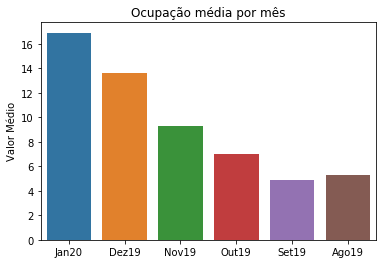

In [370]:
#Visualizando 

sns.barplot(df_dia.mean()[0:6].index, df_dia.mean()[0:6])
plt.ylabel("Valor Médio")
plt.title('Ocupação média por mês')

## Sugestões

Podemos concluir a partir das análises acima que:
- Nos meses de alta temporada (Jan e Dez) temos um maior faturamento assim como um taxa de ocupação maior do que os outros meses.
- Os valores dos alugueis não apresentam apenas uma faixa de valor, possuindo muitos valores extremamentes altos (outliers) que fazem com que a média dos alugueis no mês suba.
    
    
##### Previsão do Faturamento
- Podemos dizer que após os meses da alta temporada o volume de alugueis diminuir, consequêntemente o faturamento. Mas existe uma tendência de que os alugueis tenham o mesmo comportamento dos meses de baixa temporada.
- Caso obtivessemos o faturamento de um periódo mais longo (de alguns anos) poderia ser utilizado um modelo de series temporais para prever o faturamento.


##### Precificação
- Ápos algumas análises é possivel ver que os alugueis mais altos possuem uma taxa de ocupação muito alta em Dezembro e Janeiro, poderia se adotar uma estrátegia para aproveitar essa alta demanda e aumentar o aluguel.
- Por outro lado os algueis mais baixos na baixa temporada possuem uma baixa procura, poderia se adotar uma estratégia promocial nesses casos.
- A precificação poderia ser feita atrávez de uma taxa de procura baseado no mesmo período anterior, no caso o ano anterior.
    